<font color=navy>

# 중간고사 
### 다변량통계분석: 2021년 1학기 

<font color=blue>
    
- *각 문항에 답을 하기 위해 사용된 코드, 그래프, 표, 통계량 등을 반드시 모두 제시하세요.*
- *모든 통계 검정은 유의수준 0.05를 사용하세요.*
- *아래의 문제에 답을 채워넣은 뒤 모든 결과물이 프린트 된 상태에서 `File>Download as>HTML(.html)` 형식으로 저장하여 e-campus를 통해 제출하세요. (5 pts)*
- *수기로 작성한 부분은 따로 파일로 저장하여 함께 제출하세요.*

#### 1. La Quinta Motor Inns은 전미에 위치한 business traveler를 위한 모텔 체인이다. 이 회사는 최근에 시장 점유율을 늘리기 위해 새로운 모텔을 지으려 한다. 회사의 매니저는 이익에 영향을 주는 요소를 파악하여 새 모텔을 짓기에 적절한 지역을 예측하기 위해 100개의 La Quinta 모텔을 무작위로 선정하여 아래의 변수들을 수집하였다. 데이터는 ‘laquinta1.csv’에 있다.


|변수명   |내용   |
|---|---|
|  Margin |  operating margin (%) |
| Number  |  해당 모텔의 3 마일 반경 안에 있는 모텔이나 호텔 방의 수|
| Nearest  | 가장 가까운 경쟁 모텔 혹은 호텔 과의 거리 (in miles)  |
| Office_Space  | 커뮤니티에 있는 사무실 규모 (in 1000 ft^2)  |
| Enrollment | 근처 대학의 등록자 수 (in 1000명) | 
| Income | 커뮤니티의 중위소득 (in $1000) | 
| Distance | 시내 중심까지의 거리 (in miles)|

In [5]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [6]:
data_path = "../data/"

In [7]:
laquinta = pd.read_csv(data_path + "laquinta.csv");laquinta.head()

,Margin,Number,Nearest,Office_Space,Enrollment,Income,Distance
0,55.5,3203,4.2,549,8.0,37,2.7
1,33.8,2810,2.8,496,17.5,35,14.4
2,49.0,2890,2.4,254,20.0,35,2.6
3,31.9,3422,3.3,434,15.5,38,12.1
4,57.4,2687,0.9,678,15.5,42,6.9


#### a.	(6 pts)  자료 간의 산점도 행렬과 상관계수 행렬을 프린트 하시오. Margin과 가장 선형상관관계가 강한 변수는 무엇인가? 가장 약한 변수는 무엇인가? 

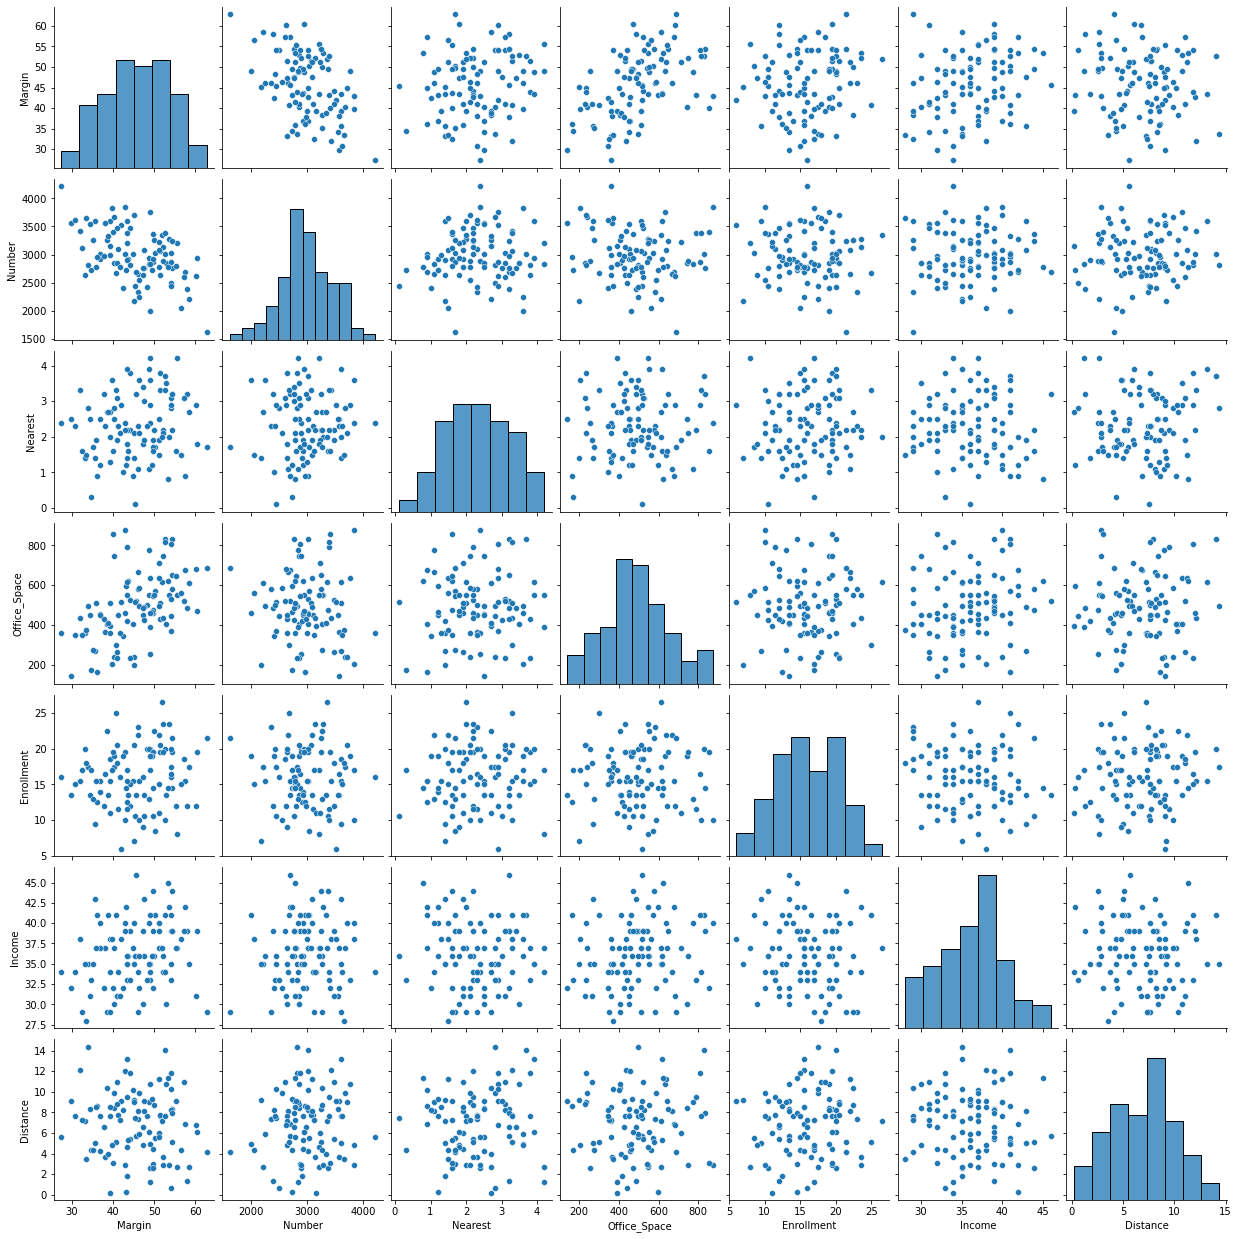

In [8]:
sns.pairplot(laquinta)
plt.show()

In [9]:
laquinta.corr()

,Margin,Number,Nearest,Office_Space,Enrollment,Income,Distance
Margin,1.000000,-0.470329,0.160252,0.501431,0.123012,0.247500,-0.092272
Number,-0.470329,1.000000,0.081680,-0.093475,-0.063908,0.037143,0.073009
Nearest,0.160252,0.081680,1.000000,0.042762,0.071237,-0.045322,0.091287
Office_Space,0.501431,-0.093475,0.042762,1.000000,-0.001030,0.152614,0.032855
Enrollment,0.123012,-0.063908,0.071237,-0.001030,1.000000,-0.112632,0.097324
Income,0.247500,0.037143,-0.045322,0.152614,-0.112632,1.000000,-0.051541
Distance,-0.092272,0.073009,0.091287,0.032855,0.097324,-0.051541,1.000000


답) Margin과 가장 선형상관관계가 강한 변수는 0.501431로 Office_Space이다.

#### 수정답) Margin과 가장 선형상관관계가 약한 변수는 -0.092272로 Distance이다.
#### 틀린이유) 실수로 선형상관관계가 약한 변수를 적지 못했습니다.

#### b. (6 pts) Margin을 다른 변수들로 설명하는 회귀식을 추정하고 추정된 회귀식을 쓰시오. 

In [10]:
formula = 'Margin~'+'+'.join(laquinta.columns[1:]);formula

'Margin~Number+Nearest+Office_Space+Enrollment+Income+Distance'

In [11]:
model = smf.ols('Margin~'+'+'.join(laquinta.columns[1:]), laquinta).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     17.14
Date:                Tue, 04 May 2021   Prob (F-statistic):           3.03e-13
Time:                        11:11:30   Log-Likelihood:                -308.96
No. Observations:                 100   AIC:                             631.9
Df Residuals:                      93   BIC:                             650.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       38.1386      6.993      5.454      0.000      24.252      52.025
Number          -0.0076      0.001     -6.069      0.000      -0.010      -0.005
Nearest          1.6462      0.633      2.601      0.011       0.390       2.903
Office_Space     0.0198      0.003      5.796      0.000       0.013       0.027
Enrollment       0.2118      0.133      1.587      0.116      -0.053       0.477
Income           0.4131      0.140      2.960      0.004       0.136       0.690
Distance        -0.2253      0.179     -1.260      0.211      -0.580       0.130
==============================================================================
Omnibus:                        1.437   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.471
Skew:                          -0.223   Prob(JB):                        0.479
Kurtosis:                       2.607   Cond. No.                     3.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

답) y_hat = 38.14 - (0.008* Number) + (1.65* Nearest) + (0.02* Office_space) + (0.21* Enrollment) + (0.41* Income) - (0.23* Distance)

#### c. (6 pts) 회귀모형이 유의한지 검정하시오. 즉, Margin과 나머지 변수들 간의 상관관계가 유의한지 검정하시오. (귀무가설, 대립가설, 검정통계량, p-value, 결론 명시)

답)
#### 모델의 유의성 평가: F검정
- H0: beta1=beta2=beta3=beta4=beta5=beta6=0
- H1: 적어도 하나의 betai(i=1,2,3,4,5,6)은 0이 아니다.
- F통계량 : 17.14
- p-value : 3.03e-13
- 결론 : p-value = 3.03e-13<0.05이므로 H0를 기각하며 적어도 하나의 beta는 0이 아니고, 이는 적어도 하나의 변수는 Margin과 상관관계가 있고 유의하다는 결론이 나온다.

#### d. (6 pts) 스튜던트화 잔차의 그래프를 그리고 이상치가 있는지 판단하시오. 

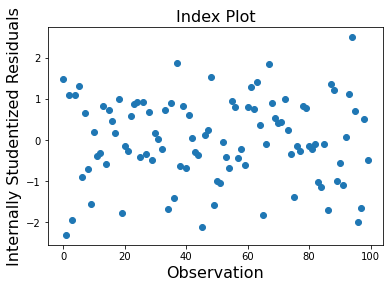

In [12]:
inf = OLSInfluence(model)
inf.plot_index('resid', threshold=3)
plt.show()

답) 스튜던트화 잔차의 절대값이 3이상인 값을 이상치로 설정하기로 하고 스튜던트화 잔차 그래프를 그린결과 이상치가 없다고 판단된다.

#### e. (6 pts) La Quinta Motor Inns는 한 도시에 새로운 모텔을 지으려고 한다. 해당 지역에 대한 조사를 한 결과, 3마일 안에 3815개의 경쟁 모텔의 방이 있고, 가장 가까운 호텔 또는 모텔이 0.9 마일 떨어져 있고, 해당 커뮤니티의 사무실 규모가 476,000ft^2이고, 근처에 두 대학에 24500명의 학생이 등록해있으며, 중위소득이 $35,000 이고 시내중심까지의 거리가 11.2마일이었다. 이 지역에 새로운 모텔을 지었을 때 Margin에 대한  98% 예측구간을 위의 b에서 적합한 모형을 사용하여 구하시오. 

In [13]:
pred = model.get_prediction(exog = dict(Number=3815, Nearest=0.9, Office_Space=476, Enrollment=24.5, Income=35, Distance=11.2 ))
pred.summary_frame(alpha=0.02)



,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,37.091488,2.075621,32.178254,42.004722,23.149345,51.033631


답) 이 지역에 새로운 모텔을 지었을 때 Margin은 [23.149345, 51.033631] 범위 내에 있을 것으로 98% 확신한다.

#### 2.  ‘webusage.csv’ 데이터는 2182명의 인터넷 사용자의 1년간 사용기록과 개인정보를 담고 있다. 변수는 아래와 같다.  총 인터넷 사용시간(T_USAGE)을 성별, 학력, 거주지역으로 설명하는 모형을 만들려고 한다. 아래의 질문에 답하시오. 
|    변수명       |    설명                                     |
|---------------------|-------------------------------------------------|
|    CUS_ID       |  사용자 ID                                |
|    T_USAGE      |  총 사용시간 (초)                          |
|    PAGEVIEWS    |  총 페이지뷰                              |
|    GENDER       |  성별 (여자, 남자)                        |
|    SCHOOL       |  학력 (중졸이하, 고졸, 대졸, 대학원졸)    |
|    LOCATION     |  거주지역 (서울, 그외)                    |


In [14]:
webusage = pd.read_csv(data_path + "webusage.csv");webusage.head()

,Unnamed: 0,CUS_ID,T_USAGE,PAGEVIEWS,GENDER,SCHOOL,LOCATION
0,1,2,836048,25498,여자,대졸,서울
1,2,4,275572,12831,남자,고졸,그외
2,3,8,101640,5871,남자,대졸,그외
3,4,10,1222047,43544,남자,대졸,서울
4,5,11,90562,5582,남자,대학원졸,그외


#### a. (8 pts) 성별은 ‘여자’를, 학력은 ‘중졸이하’를, 거주지역은 ‘그외’를 reference level로 하는 더미변수를 생성하기 위해 각 범주가 가져야 하는 값을 아래의 표에 채우시오. 

| 성별	| Dummy1 |
|--------|--------|
| 여자	|   0   |
| 남자	|   1   |


|학력	| Dummy2 |	Dummy3 |	Dummy4|
|----|--------|---------|----------|
|중졸이하	| 0 | 0 | 0 |		
|고졸	    | 1 | 0 | 0 |		
|대졸	    | 0 | 1 | 0 |		
|대학원졸    | 0 | 0 | 1 |			

|거주지역	| Dummy5|
|---------|-------|
|서울      |  1  |	
|그외	     |  0  |


답) 표에 직접 값을 채웠습니다.

#### b. (9 pts) 위에서 설계한 바와 동일한 dummy 변수를 포함하는 회귀모형을 적합하여 회귀계수를 추정하고 추정된 회귀식을 쓰시오.

In [15]:
model1 = smf.ols('T_USAGE~C(GENDER, Treatment(reference = "여자"))+C(SCHOOL, Treatment(reference = "중졸이하"))+C(LOCATION, Treatment(reference = "그외"))', webusage).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                T_USAGE   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     46.62
Date:                Tue, 04 May 2021   Prob (F-statistic):           6.71e-46
Time:                        11:11:31   Log-Likelihood:                -31096.
No. Observations:                2182   AIC:                         6.220e+04
Df Residuals:                    2176   BIC:                         6.224e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                       2.557e+05   5.38e+04      4.750      0.000     1.5e+05    3.61e+05
C(GENDER, Treatment(reference="여자"))[T.남자]      6.219e+04   1.66e+04      3.753      0.000    2.97e+04    9.47e+04
C(SCHOOL, Treatment(reference="중졸이하"))[T.고졸]     5.48e+04   5.44e+04      1.008      0.314   -5.19e+04    1.61e+05
C(SCHOOL, Treatment(reference="중졸이하"))[T.대졸]     1.23e+05    5.3e+04      2.321      0.020    1.91e+04    2.27e+05
C(SCHOOL, Treatment(reference="중졸이하"))[T.대학원졸]  1.365e+05   5.65e+04      2.418      0.016    2.58e+04    2.47e+05
C(LOCATION, Treatment(reference="그외"))[T.서울]    2.437e+05   1.64e+04     14.821      0.000    2.11e+05    2.76e+05
==============================================================================
Omnibus:                      876.176   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4788.971
Skew:                           1.825   Prob(JB):                         0.00
Kurtosis:                       9.273   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- D(성별) = 1 (GENDER = 남자)
- D(성별) = 0 (GENDER = 여자 -> 남자가 아닐 때)

- D(고졸) = 1 (SCHOOL = 고졸)
- D(고졸) = 0 (SCHOOL != 고졸)

- D(대졸) = 1 (SCHOOL != 대졸)
- D(대졸) = 0 (SCHOOL != 대졸)

- D(대학원졸) = 1 (SCHOOL != 대학원졸)
- D(대학원졸) = 0 (SCHOOL != 대학원졸)

- D(위치) = 1 (LOCATION = 서울)
- D(위치) = 0 (LOCATION = 그외 -> 서울이 아닐때)

답) y_hat = 255700 + 62190* D(성별) + 54800* D(고졸) + 123000* D(대졸) + 136500* D(대학원졸) + 243700* D(위치)

#### c. (12 pts) 지역과 성별의 교호작용이 유의한가? 교호작용 항의 계수를 사용하여 "서울 여자", "서울 남자", "그외 지역  여자", "그외 지역 남자" 중 T_USAGE의 평균이 가장 높은 그룹이 무엇인지 답하시오.

In [16]:
model2 = smf.ols('T_USAGE~C(GENDER, Treatment(reference = "여자"))+C(LOCATION, Treatment(reference = "그외"))+C(GENDER, Treatment(reference = "여자"))*C(LOCATION, Treatment(reference = "그외"))', webusage).fit()
model2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                T_USAGE   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     78.03
Date:                Tue, 04 May 2021   Prob (F-statistic):           6.08e-48
Time:                        11:11:31   Log-Likelihood:                -31096.
No. Observations:                2182   AIC:                         6.220e+04
Df Residuals:                    2178   BIC:                         6.222e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                 4.16e+05   1.96e+04     21.200      0.000    3.77e+05    4.54e+05
C(GENDER, Treatment(reference="여자"))[T.남자]                                                -1.8e+04    2.4e+04     -0.748      0.454   -6.52e+04    2.92e+04
C(LOCATION, Treatment(reference="그외"))[T.서울]                                             1.549e+05   2.51e+04      6.176      0.000    1.06e+05    2.04e+05
C(GENDER, Treatment(reference="여자"))[T.남자]:C(LOCATION, Treatment(reference="그외"))[T.서울]  1.461e+05   3.31e+04      4.421      0.000    8.13e+04    2.11e+05
==============================================================================
Omnibus:                      863.317   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4662.437
Skew:                           1.798   Prob(JB):                         0.00
Kurtosis:                       9.192   Cond. No.                         7.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

답) 교호작용항은 0.000<0.05 이므로 유의하다.

y_hat = 416000 - 18000* D(성별) + 154900* D(위치) + 146100* (D(성별)* D(위치))
- y_hat = 416000 - D(성별)* (18000 - 146100* D(위치))
- y_hat = 416000 + D(위치)* (154900 + 146100* D(성별))

답) 
- 서울남자 = 699000
- 서울여자 = 570900
- 그외남자 = 398000
- 그외여자 = 416000

답) "서울 여자", "서울 남자", "그외 지역 여자", "그외 지역 남자" 중 T_USAGE의 평균이 가장 높은 그룹은 "서울 남자"이다.

#### 3.	한 연구자는 대학원 지원자의 GRE(graduate record exam; gre) 점수, 학점(gpa), 학부 졸업대학의 랭킹(rank)이 합격여부(admit=1:합격, 0:불합격)에 미치는 영향을 알아보고자 한다. `admission.csv`파일에 데이터가 저장되어 있다.

In [17]:
admission = pd.read_csv(data_path + "admission.csv");admission.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


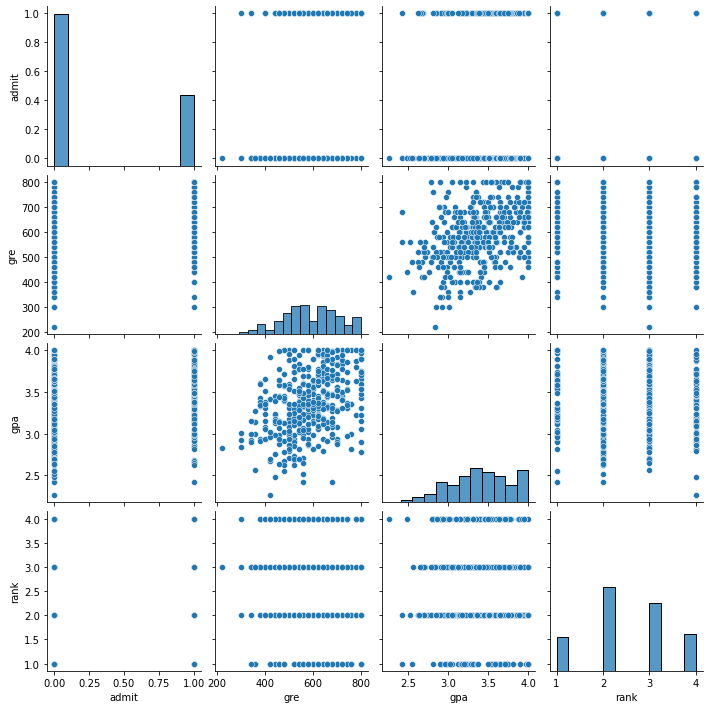

In [18]:
sns.pairplot(admission)

####  a. (9 pts) admit을 종속변수로, 나머지 변수들을 설명변수로 하는 로지스틱 회귀모형을 적합하고 그 결과물(`.summary()`)을 프린트 하시오. 

In [19]:
model3 = smf.glm('admit~gre+gpa+C(rank)', admission, family = sm.families.Binomial()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.26
Date:                Tue, 04 May 2021   Deviance:                       458.52
Time:                        11:11:35   Pearson chi2:                     397.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gre              0.0023      0.001      2.070      0.038       0.000       0.004
gpa              0.8040      0.332      2.423      0.015       0.154       1.454
================================================================================
"""

#### b. (9pts) 이미 GRE점수를 받아놓은 한 지원자가 있다. 현재 학점이 3.5인데 계절학기 재수강을 하면 학점을 3.7로 올릴 수 있다. 만일 학점을 3.7로 올린다면 이 학생이 합격할 odds는 몇 % 상승하는가?

In [20]:
import numpy as np

In [21]:
np.exp(0.8040*0.2) # 1단위 증가할 때, np.exp(0.0023)이지만 3.5에서 3.7로는 0.2 증가한 것이므로

1.1744500553122421

답) 학점을 3.5에서 3.7로 올린다면 이 학생이 합격할 odds 17.45% 증가한다.

#### c. (9 pts) 만일 학점과 GRE점수가 동일한 두 학생이 각기 rank1 의 대학과 rank2의 대학을 졸업했다고 하자. Rank1에 속한 대학을 졸업한 학생에 비해 rank2에 속한 대학을 졸업한 학생의 합격 odds는 몇 % 감소하는가?

In [22]:
np.exp(-0.6754)

0.5089527987663893

In [23]:
1-np.exp(-0.6754)

0.4910472012336107

In [24]:
(1- np.exp(-0.6754))*100

49.10472012336107

답) Rank1에 속한 대학을 졸업한 학생에 비해 rank2에 속한 대학을 졸업한 학생의 합격 odds는 49.1% 감소한다.

#### d. (9 pts) rank1대학을 졸업하고 gre가 600점, gpa가 3.5인 학생의 합격확률을 계산하시오.

In [25]:
model3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-3.9900,1.140,-3.500,0.000,-6.224,-1.756
C(rank)[T.2],-0.6754,0.316,-2.134,0.033,-1.296,-0.055
C(rank)[T.3],-1.3402,0.345,-3.881,0.000,-2.017,-0.663
C(rank)[T.4],-1.5515,0.418,-3.713,0.000,-2.370,-0.733
gre,0.0023,0.001,2.070,0.038,0.000,0.004
gpa,0.8040,0.332,2.423,0.015,0.154,1.454


In [26]:
p = np.exp(-3.9900+0.0023*600+0.8040*3.5)/(1+np.exp(-3.9900+0.0023*600+0.8040*3.5));p

0.5508238649672539

답)  rank1대학을 졸업하고 gre가 600점, gpa가 3.5인 학생의 합격확률은 55%이다.

In [29]:
model3.params

Intercept      -3.989979
C(rank)[T.2]   -0.675443
C(rank)[T.3]   -1.340204
C(rank)[T.4]   -1.551464
gre             0.002264
gpa             0.804038
dtype: float64

In [30]:
logodds = model3.params[0]+model3.params[4]*600+model3.params[5]*3.5
np.exp(logodds)/(1+np.exp(logodds))

0.545575104125523

In [28]:
pred_adm = model3.get_prediction(exog = dict(rank=1, gre=600, gpa=3.5))
pred_adm.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.545575,0.065822,0.416404,0.66889
